# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Laela Salma Lathania
- **Email:** m006d4kx2057@bangkit.academy
- **ID Dicoding:** laelasalma

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan?
- Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
day_df['hr'] = day_df['dteday'].dt.hour

In [15]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0


In [16]:
season_mapping = {
    1: "Springer",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}
day_df['season_str'] = day_df['season'].map(season_mapping)

In [17]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr,season_str
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,Springer
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0,Springer
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,Springer
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,Springer
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,Springer


In [18]:
weather_mapping = {
    1: "Sunny",
    2: "Cloudy",
    3: "Rainy",
    4: "Snowy"
}

day_df['weathersit'] = day_df['weathersit'].apply(lambda x: weather_mapping[x])

In [19]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr,season_str
0,1,2011-01-01,1,0,1,0,6,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985,0,Springer
1,2,2011-01-02,1,0,1,0,0,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801,0,Springer
2,3,2011-01-03,1,0,1,0,1,1,Sunny,0.196364,0.189405,0.437273,0.248309,120,1229,1349,0,Springer
3,4,2011-01-04,1,0,1,0,2,1,Sunny,0.200000,0.212122,0.590435,0.160296,108,1454,1562,0,Springer
4,5,2011-01-05,1,0,1,0,3,1,Sunny,0.226957,0.229270,0.436957,0.186900,82,1518,1600,0,Springer


In [20]:
day_df['temp_scaled'] = day_df['temp'] / 41 * 100

In [21]:
day_df['atemp_scaled'] = day_df['atemp'] / 50 * 100

In [22]:
day_df['hum_scaled'] = day_df['hum'] / 100 * 100

In [23]:
day_df['windspeed_scaled'] = day_df['windspeed'] / 67 * 100

In [24]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,cnt,hr,season_str,temp_scaled,atemp_scaled,hum_scaled,windspeed_scaled
0,1,2011-01-01,1,0,1,0,6,0,Cloudy,0.344167,...,0.160446,331,654,985,0,Springer,0.839432,0.727250,0.805833,0.239472
1,2,2011-01-02,1,0,1,0,0,0,Cloudy,0.363478,...,0.248539,131,670,801,0,Springer,0.886532,0.707478,0.696087,0.370954
2,3,2011-01-03,1,0,1,0,1,1,Sunny,0.196364,...,0.248309,120,1229,1349,0,Springer,0.478937,0.378810,0.437273,0.370610
3,4,2011-01-04,1,0,1,0,2,1,Sunny,0.200000,...,0.160296,108,1454,1562,0,Springer,0.487805,0.424244,0.590435,0.239248
4,5,2011-01-05,1,0,1,0,3,1,Sunny,0.226957,...,0.186900,82,1518,1600,0,Springer,0.553554,0.458540,0.436957,0.278955


In [25]:
day_df.to_csv("day_modified.csv", index=False)

In [26]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [27]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [28]:
season_mapping = {
    1: "Springer",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}
hour_df['season_str'] = hour_df['season'].map(season_mapping)

In [29]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_str
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Springer
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Springer
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Springer
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Springer
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Springer


In [30]:
weather_mapping = {
    1: "Sunny",
    2: "Cloudy",
    3: "Rainy",
    4: "Snowy"
}

hour_df['weathersit'] = hour_df['weathersit'].apply(lambda x: weather_mapping[x])

In [31]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season_str
0,1,2011-01-01,1,0,1,0,0,6,0,Sunny,0.24,0.2879,0.81,0.0,3,13,16,Springer
1,2,2011-01-01,1,0,1,1,0,6,0,Sunny,0.22,0.2727,0.80,0.0,8,32,40,Springer
2,3,2011-01-01,1,0,1,2,0,6,0,Sunny,0.22,0.2727,0.80,0.0,5,27,32,Springer
3,4,2011-01-01,1,0,1,3,0,6,0,Sunny,0.24,0.2879,0.75,0.0,3,10,13,Springer
4,5,2011-01-01,1,0,1,4,0,6,0,Sunny,0.24,0.2879,0.75,0.0,0,1,1,Springer


In [32]:
hour_df['temp_scaled'] = hour_df['temp'] / 41 * 100

In [33]:
hour_df['atemp_scaled'] = hour_df['atemp'] / 50 * 100

In [34]:
hour_df['hum_scaled'] = hour_df['hum'] / 100 * 100

In [35]:
hour_df['windspeed_scaled'] = hour_df['windspeed'] / 67 * 100

In [36]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,season_str,temp_scaled,atemp_scaled,hum_scaled,windspeed_scaled
0,1,2011-01-01,1,0,1,0,0,6,0,Sunny,...,0.81,0.0,3,13,16,Springer,0.585366,0.5758,0.81,0.0
1,2,2011-01-01,1,0,1,1,0,6,0,Sunny,...,0.80,0.0,8,32,40,Springer,0.536585,0.5454,0.80,0.0
2,3,2011-01-01,1,0,1,2,0,6,0,Sunny,...,0.80,0.0,5,27,32,Springer,0.536585,0.5454,0.80,0.0
3,4,2011-01-01,1,0,1,3,0,6,0,Sunny,...,0.75,0.0,3,10,13,Springer,0.585366,0.5758,0.75,0.0
4,5,2011-01-01,1,0,1,4,0,6,0,Sunny,...,0.75,0.0,0,1,1,Springer,0.585366,0.5758,0.75,0.0


In [37]:
hour_df.to_csv("hour_modified.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [38]:
df_weekday = day_df[day_df['workingday'] == 1]
df_holiday = day_df[day_df['workingday'] == 0]

In [39]:
total_weekday_cnt = df_weekday['cnt'].sum()
total_holiday_cnt = df_holiday['cnt'].sum()


In [40]:
df_vis = pd.DataFrame({
    'weekday': ['Weekday', 'Holiday'],
    'cnt': [total_weekday_cnt, total_holiday_cnt]
})

In [41]:
df_season_hour = hour_df.groupby(['season_str', 'hr'])['cnt'].sum()

In [42]:
print(df_season_hour)

season_str  hr
Fall        0     13822
            1      8132
            2      5716
            3      2930
            4      1541
                  ...  
Winter      19    52575
            20    37549
            21    28555
            22    21871
            23    15300
Name: cnt, Length: 96, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\user\AppData\Local\Temp\ipykernel_16004\1992555355.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='cnt', data=df_vis, palette=['skyblue', 'lightgreen'])


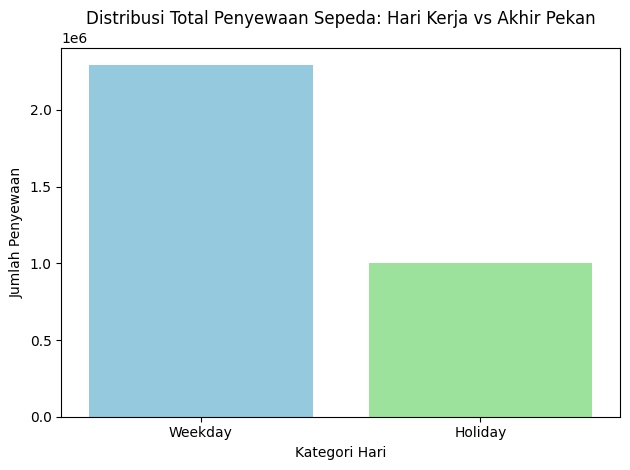

In [43]:
sns.barplot(x='weekday', y='cnt', data=df_vis, palette=['skyblue', 'lightgreen'])

plt.xlabel('Kategori Hari')
plt.ylabel('Jumlah Penyewaan')
plt.title('Distribusi Total Penyewaan Sepeda: Hari Kerja vs Akhir Pekan')

plt.tight_layout()

plt.show()

### Pertanyaan 2:

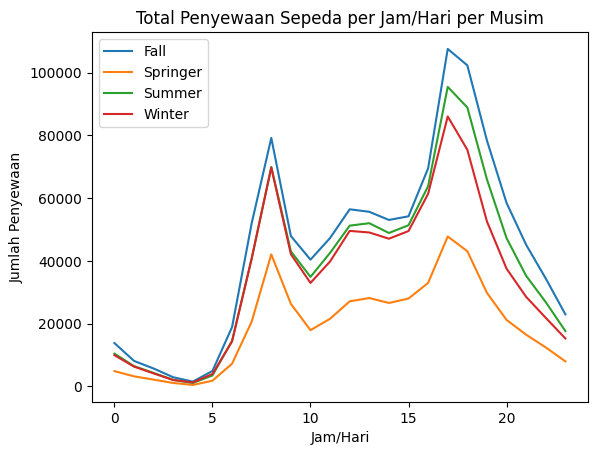

In [44]:
for season in df_season_hour.index.levels[0]:
    plt.plot(df_season_hour.index.levels[1], df_season_hour[season], label=season)
plt.xlabel("Jam/Hari")
plt.ylabel("Jumlah Penyewaan")
plt.title("Total Penyewaan Sepeda per Jam/Hari per Musim")
plt.legend()
plt.show()

## Conclusion

- Pada visualisasi tersebut terlihat total penyewaan sepeda pada hari kerja (weekday) lebih tinggi dibandingkan dengan akhir pekan (holiday). Hal ini terlihat dari batang biru yang lebih tinggi dibandingkan batang hijau. Perbedaan total penyewaan antara hari kerja dan akhir pekan cukup signifikan. Hal ini menunjukkan bahwa aktivitas bersepeda lebih banyak dilakukan pada hari kerja dibandingkan akhir pekan.
- Pada visualisasi terlihat bahwa musim (season) berpengaruh terhadap banyaknya penyewaan sepeda. Terlihat bahwa grafik pada musim gugur (fall) paling tinggi dintara musim lain sehingga pada musim tersebut paling banyak penyewaan sepeda. Diikuti dengan musim panas (summer), musim dingin (winter) dan yang paling rendah adalah musim semi (springer)